# Standard Input&Output 
- 표준출력(stdout): 따로 Redirection 없으면 콘솔 출력 
- 표준입력(stdin) : 따로 Redirection 없으면 콘솔 입력 

In [1]:
# 표준출력
print("This","Sentence")
print("This","Sentence",sep=", ")

This Sentence
This, Sentence


In [5]:
# 표준입력
var = input()
var
print(type(var))

1234
<class 'str'>


# File Open 
- 파이썬은 File Descriptor를 열기 위하여 open내장 함수를 사용한다. 
- `open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)`
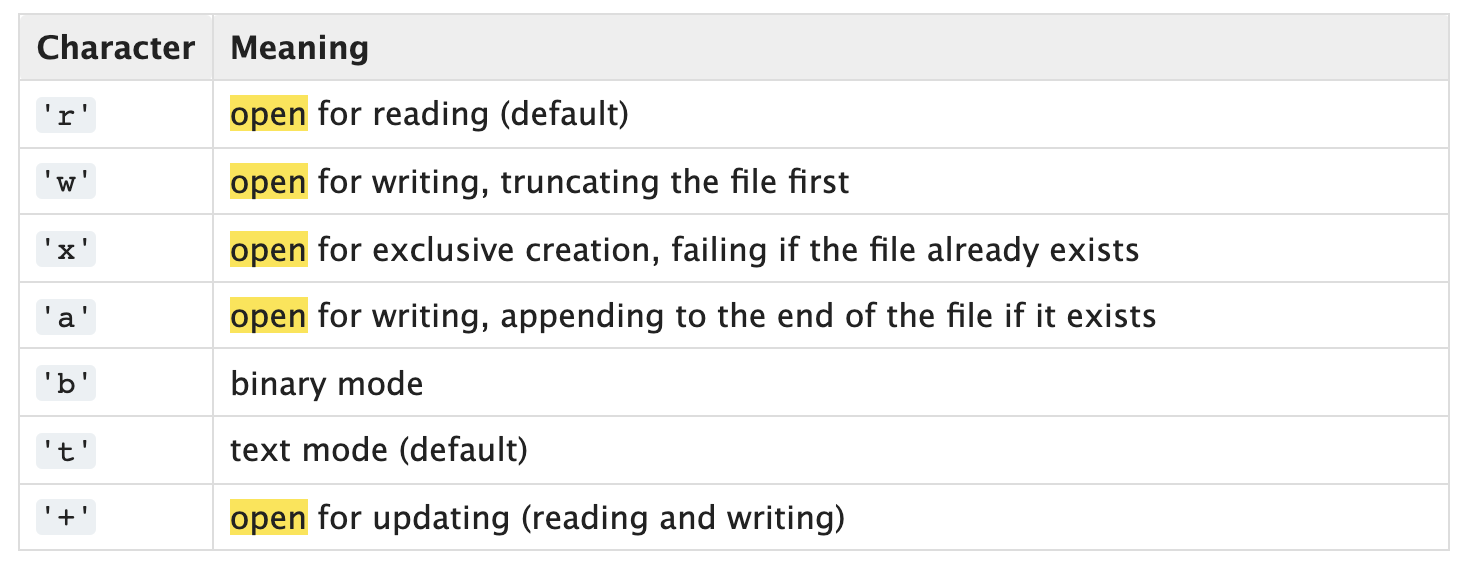


In [16]:
fd = open('./test.txt','r',encoding='utf-8') 
fd.close()


Q. 잉 오픈의 의미가 정확히 뭐지? 경로를 지정해주는걸로 인식하는게 편할거야. 

# File Read
- Read메소드로 파이 읽기 가능 
- File Descriptor 닫는것을 깜빡할때가 많음
- with \<ContextManager> as \<returnValue> 구문형태로 ⇒ 자동으로 닫아줌 

In [18]:
# Readd메소드로 파일 읽기 
fd = open('./test.txt','r',encoding='utf-8')
contents = fd.read() 
fd.close()

print(contents)

Hello,World!
Hello,World!
Hello,World!
Hello,World!
Hello,World!
Hello,World!
Hello,World!
Hello,World!
Hello,World!
Hello,World!


In [19]:
# Context Manager로 파일 전체 읽고 자동으로 닫아주기 
with open('./test.txt','r',encoding='utf-8') as fd:
    contents = fd.read()

print(contents)

Hello,World!
Hello,World!
Hello,World!
Hello,World!
Hello,World!
Hello,World!
Hello,World!
Hello,World!
Hello,World!
Hello,World!


# File Read Lines 
- 줄 단위로 잘라서 읽기 
- \\n가 사라지는 건 아니다. 
- readlines() : 전체 읽어 줄단위로 잘라서 반환
- string list가 반환

In [28]:
contents = [] 
with open('./test.txt','r',encoding='utf-8') as f:
    for sentence in f :
        contents.append(sentence)
        
print(contents)

['Hello,World!\n', 'Hello,World!\n', 'Hello,World!\n', 'Hello,World!\n', 'Hello,World!\n', 'Hello,World!\n', 'Hello,World!\n', 'Hello,World!\n', 'Hello,World!\n', 'Hello,World!']


- readlines() : 전체 읽어 줄단위로 잘라서 반환
- string list가 반환 

In [26]:
# readlines() 사용 
with open('./test.txt','r') as f :
     contents = f.readlines()
    
print(contents)
print(type(contents))

['Hello,World!\n', 'Hello,World!\n', 'Hello,World!\n', 'Hello,World!\n', 'Hello,World!\n', 'Hello,World!\n', 'Hello,World!\n', 'Hello,World!\n', 'Hello,World!\n', 'Hello,World!']
<class 'list'>


# File Write
- Write메소드로 파일 쓰기 가능 
- Writes메소드로 여러 줄 작성 
    - 줄 바꿈 문자 \n 넣어주지 않음 
- 추가하기 모드 'a'로 파일 뒤에 덧붙이기 가능 

In [29]:
with open('./test.txt','w') as f:
    for i in range(10):
        f.write(f"{i+1}번째 문장\n")

In [35]:
# writelines을 여러줄을 작성해보자 
with open('./test.txt','w') as f :
    f.writelines(f'{i+1}번째 줄입니다.' for i in range(10))

Q. 위에랑 차이가 뭐지? for, \n도 동일하게 진행되는데;; 

In [36]:
# 위와 같이 작성하게 될 경우 기존의 자료가 날라간다. 
# 덧붙이기 위해서는 'a'모드로 추가하여 쓴다. 
with open('./test.txt','a') as f:
    f.write("내용을 추가합니다\n")
    f.writelines(f'{i+1}번째 줄입니다\n' for i in range(i,i+10))

# Directory 
- os라이브러리로 플랫폼 독립적인 폴더 생성 가능
- path라이브러리로 경로 관련 연산 가능 

In [42]:
import os

# os.mkdir('./test') # 폴더 하나만들기, 이미 있으면 에러 발생 

if not os.path.isdir('./test'): # 폴더가 있는지 확인 
    os.mkdir('test1') # 폴더가 아니거나 없으면 False로 생성해준다
    
# 하위폴더 한번에 만들기, exist_ok옵션으로 이미 있으면 무시할지 학인 
os.makedirs('./test/a/b/c', exist_ok=True)

# Listing Directory 
- listdir()함수로 폴더 내 파일/하위 폴더 검색 가능 

In [45]:
import os
print([entry for entry in os.listdir('test')])
print(*[entry for entry in os.listdir('test')])

['a']
a


- glob 라이브러리로 유닉스 스타일 경로명 패턴 확장 적용 가능 

In [47]:
import glob 
print(*[entry for entry in glob.glob('test/*.txt')])

test/b.txt test/a.txt


# Pickle 
- 파이썬 객체를 그대로 저장하고 싶다면 피클
- 객체를 직렬화(Serialize)하여 파일로 저장 
- 장점 
    - 쓰기쉽다 
    - 파이썬 개체를 그대로 저장
- 단점
    - 파이썬에서만 읽을수 있다
    - 보안문제가 있다. 
    - 신뢰할수 있는 개체만 불러올것 

In [59]:
import pickle

seq = [[i * j for j in range(100) for i in range(100)]] # 저장하고싶은 객체 

with open('./test.pkl', 'wb') as f:
    pickle.dump(seq,f) # pickle 저장
del seq # 개체삭제, 이거 왜 삭제하는거야 ? 

with open('./test.pkl','rb') as f: # pickle불러오기
    seq = pickle.load(f)

print(seq)
# print(seq[2][9]) # 개체접근 가능 <-- 랭쥐 에러뜨는데? 

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144

Q. 피클? 정확히 이해가 안되네 

# Class Pickling 
- 클래스 객체를 직렬하기 위해선 해당 클래스가 직렬화가능 필요 
- 모든 속성(attribute)가 직렬화 가능 필요
- 저장된 객체 pickle을 로드하고 싶다면 미리 해당 클래스 선언 필요
- 해당 클래스 정보가 없다면 역직렬화 불가능 

Q. 무슨말이지;; 

In [78]:
import pickle

class MyComplex:
    def __init__(self, real, imaginary):
        self.real = real
        self.imaginary = imaginary
        
    def __add__(self, other):
        return MyComplex(
            self.real + other.real,
            self.imaginary + other.imaginary
        )
    
my_complex = MyComplex(3, -5)

with open('./test.pkl','wb') as f:
    pickle.dump(my_complex, f)

del my_complex

with open('./test.pkl','rb') as f:
    my_complex = pickle.load(f)

del my_complex 

# with open('./test.pkl','rb') sd f:
#     my_complex = pickle.load(f) # 에러발생, 왜? 

# CSV(Comma Separate Values)
- 표 데이터를 프로그램에 상관없이 쓰기 위한 데이터 형식
- 필드를 쉼표로 구분한 텍스트 파일
- 탭(TSV), 공백(SSV) 등으로 구분하기도 함
- 통칭하여 CSV(Character Separated Values)라 지칭

# Reading CSV 
- csv라이브러리로 쉽게 읽기 쓰기 가능 

In [79]:
import csv

with open('./test.csv','r') as fd:
    reader = csv.reader(
        fd, # file Descriptor 필수 
        delimiter = ',', # 구분자, 기본은 콤마 
        quotechar='"', # 텍스트 감싸는 문자, 기본은 "
        quoting = csv.QUOTE_MINIMAL, # parsing 방식,기본은 최소길이
    )
    
    for entry in reader : # 한줄씩 순환
         print(entry)

['id', 'label']
['0', 'label_9']
['1', 'label_9']
['2', 'label_9']
['3', 'label_9']
['4', 'label_9']
['5', 'label_9']
['6', 'label_9']
['7', 'label_9']
['8', 'label_9']
['9', 'label_9']
['10', 'label_9']
['11', 'label_9']
['12', 'label_9']
['13', 'label_9']
['14', 'label_9']
['15', 'label_9']
['16', 'label_9']
['17', 'label_9']
['18', 'label_9']
['10', 'label_10']
['11', 'label_11']
['12', 'label_12']
['13', 'label_13']
['14', 'label_14']
['15', 'label_15']
['16', 'label_16']
['17', 'label_17']
['18', 'label_18']


# Writing CSV
- csv라이브러리로 쉽게 csv 읽기 쓰기 가능 

In [80]:
import csv 

with open('./test.csv','w') as fd :
    writer = csv.writer(
        fd,
        delimiter=',',
        quotechar='"',
        quoting = csv.QUOTE_MINIMAL,
    )
    
    writer.writerow(['id','label']) # 한줄쓰기
    writer.writerows([i, f"label_{i}"] for i in range(10)) # 여러줄쓰기 

In [81]:
# 새로 씌여지는거니 덧붙이로 하려면? 
with open('./test.csv','a') as fd:
    writer = csv.writer(fd)
    
    writer.writerows([i, f"label_{i}"] for i in range(10,i+10))

In [82]:
# 확인 
with open('./test.csv','r') as fd:
    reader = csv.reader(fd)
    
    for entry in reader :
        print(entry)

['id', 'label']
['0', 'label_0']
['1', 'label_1']
['2', 'label_2']
['3', 'label_3']
['4', 'label_4']
['5', 'label_5']
['6', 'label_6']
['7', 'label_7']
['8', 'label_8']
['9', 'label_9']
['10', 'label_10']
['11', 'label_11']
['12', 'label_12']
['13', 'label_13']
['14', 'label_14']
['15', 'label_15']
['16', 'label_16']
['17', 'label_17']
['18', 'label_18']


# JSON 
- JavaScript Object Natation
- 웹업어인 자바스크립트의 데이터 객체 표현방식
- 자료구조 양식을 문자열로 표현
- 간결하게 표현되어 사람과 컴퓨터 모두 읽기 편함
- 코드에서 불러오기 쉽고 파일 크기 역시 작은 편
- 최근 각광받는 자료구조 형식
- 그럼에도 Parser 직접 작성은 매우 귀찮음 

# Reading JSON 
- JSON 라이브러리로 읽기 쓰기 가능 

In [102]:
import json 

with open('./test.json','r') as fd:
    data = json.load(fd) # json읽기 
    
# print(data["contacts"]) # python 객체처럼 읽기 
print(data["contacts"][2])
# print(data["contacts"][0]['id']) 
# print(data["contacts"][0]['phone']['mobile']) 

{'id': 'c202', 'name': 'Leonardo Dicaprio', 'email': 'leonardo_dicaprio@gmail.com', 'address': 'xx-xx-xxxx,x - street, x - country', 'gender': 'male', 'phone': {'mobile': '+91 0000000000', 'home': '00 000000', 'office': '00 000000'}}


# Writeing JSON
- json 라이브러리로 읽기 쓰기 가능 

In [106]:
import json 

obj = {
    "id": "c300",
    "name": "test",
    "email": "test@gmail.com",
    "address": "1111, x - seoul",
    "gender" : "female",
    "phone": {
        "mobile": "+81 0000000000",
        "home": "11 000000",
        "office": "12 000000"
    }
}

# with open('./test.json','w') as fd: # 새로쓰기
#     json.dump(obj,fd)
    
with open('./test.json','a') as fd:
    json.dump(obj,fd)

Q. contact [] 대괄호 안에 들어가려면 어떻게 해야함?    
구조에 맞춰서 삽입해야하니까.. 

# XML
- eXtensible Markup Language
- 데이터 구조와 의미를 설명하는 태그를 활용한 언어 
- <태그>와</태그> 사이에 값을 표시
- 문자열로 처리
- <태그 속성=값> 형태로 태그에 속서우여
- HTML은 웹페이지 표시를 위한 XML
- 정규표현식으로 파싱가능
- HTML파일을 읽어 웹크롤러 제작 가능 

#  Beautifulsoup 
- 파이썬 기본 XML parser는 다소 불편 
- 일반적으로 XML, HTML 파싱을 위해 라이브러리 사용
- Beautifulsoup, xmltodict, ... 


- Beautifulsoup
- https://www.crummy.com/software/BeautifulSoup/
- 가장 많이 쓰이는 parser 중 하나 
- HTML, XML등 마크업 언어 스크래핑(scraping)을 위한 도구
- 속도는 다소 느리다 간편하게 사용 


# Read XML 
- Beautiful Soup으로 xml읽어보기  
- test.xml
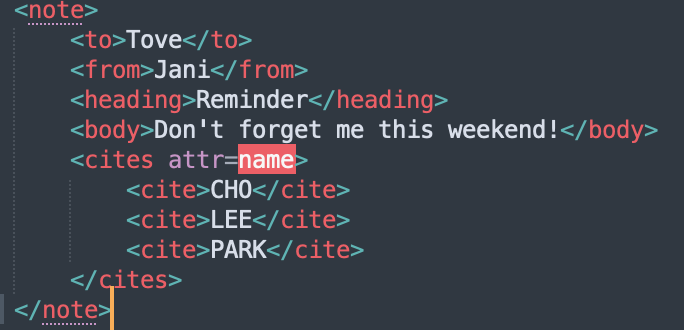

In [136]:
from bs4 import BeautifulSoup

with open('./test.xml','r') as fd:
    soup = BeautifulSoup(
        fd.read(),
        'html.parser'
    )
print('[-] soup : \n',soup)

to_tag = soup.find(name='to') # 문서 전체에서 'to' 태그 찾기
print('\n[-] to_tag : ',to_tag) # 'to'태그 내 문자열 출력

cites_tag = soup.find(name='cites') # 'cites'태그 찾기 
print('\n[-] cites_tag.attrs : ',cites_tag.attrs) # 'cite'태그의 모든 속성
print('\n[-] cites_tag[\'attr\'] :', cites_tag['attr']) # 'attr'속성 값 참조
 
cites_tag = soup.find(attrs={'attr':'name'}) # 속성으로 태그 찾기 
for cite_tag in cites_tag.find_all(name='cite'):
    print('[-] cite_tag : ',cite_tag.string)

[-] soup : 
 <note>
<to>Tove</to>
<from>Jani</from>
<heading>Reminder</heading>
<body>Don't forget me this weekend!</body>
<cites attr="name">
<cite>CHO</cite>
<cite>LEE</cite>
<cite>PARK</cite>
</cites>
</note>

[-] to_tag :  <to>Tove</to>

[-] cites_tag.attrs :  {'attr': 'name'}

[-] cites_tag['attr'] : name
[-] cite_tag :  CHO
[-] cite_tag :  LEE
[-] cite_tag :  PARK


In [ ]:
# 끝! 